In [2]:
#1. Data Cleaning and Preprocessing
#1.1 Identification and Handling of Missing Values

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('history_rental_df.csv')

# Display the first few rows of the dataframe
df.head()

# Identify missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


C:\Users\anike\AppData\Local\Temp\ipykernel_6096\1806789334.py:10: DtypeWarning: Columns (5,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('history_rental_df.csv')


id                              7
address                        22
unique_address_id              15
link                           15
size                           16
buildingType                   27
layout                         19
standardized_layout          4126
rent                           47
elevator                       47
siteOwner                    9253
rent_out_time               18615
totalFloors                    52
totalApartments              5438
buildingMaterial             2421
heating                      2204
heatingSource                2375
removed_timestamp           14727
added_timestamp             14735
buildingYear                 6463
property_id                 13989
r_model_check                1079
history_added_timestamp    159352
ffqc                        76298
dtype: int64

In [3]:
df.shape

(161552, 25)

In [4]:
df.drop('history_added_timestamp',axis= 1, inplace=True)
df.drop('Unnamed: 0',axis= 1, inplace=True)
df.drop('ffqc',axis= 1, inplace=True)
df.drop('removed_timestamp',axis= 1, inplace=True)
df.drop('added_timestamp',axis= 1, inplace=True)
df.drop('link',axis= 1, inplace=True)
df.drop('id',axis= 1, inplace=True)
df.drop('unique_address_id',axis= 1, inplace=True)
df.drop('address',axis= 1, inplace=True)
df.drop('layout',axis= 1, inplace=True)
df.drop('buildingMaterial',axis= 1, inplace=True)
df.drop('heatingSource',axis= 1, inplace=True)
df.drop('heating',axis= 1, inplace=True)
df.drop('r_model_check',axis= 1, inplace=True)


In [5]:
df.head()

,size,buildingType,standardized_layout,rent,elevator,siteOwner,rent_out_time,totalFloors,totalApartments,buildingYear,property_id
0,75.0,Kerrostalo,3.0,985,On,Oma,27,6,27.0,1995.0,8.372070e+13
1,41.5,Kerrostalo,1.0,600,On,Oma,5,6,27.0,1995.0,8.372070e+13
2,75.0,Kerrostalo,3.0,942,On,Oma,22,6,27.0,1995.0,8.372070e+13
3,75.0,Kerrostalo,3.0,942,On,Oma,13,6,27.0,1995.0,8.372070e+13
4,51.0,Kerrostalo,2.0,692,On,Oma,23,6,27.0,1995.0,8.372070e+13


In [6]:
# Convert the 'rent' column to float, handling potential errors
df['rent'] = pd.to_numeric(df['rent'], errors='coerce')
df['size'] = pd.to_numeric(df['size'], errors='coerce')
df['rent_out_time'] = pd.to_numeric(df['size'], errors='coerce')
df['totalFloors'] = pd.to_numeric(df['size'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161552 entries, 0 to 161551
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   size                 161513 non-null  float64
 1   buildingType         161525 non-null  object 
 2   standardized_layout  157426 non-null  float64
 3   rent                 161481 non-null  float64
 4   elevator             161505 non-null  object 
 5   siteOwner            152299 non-null  object 
 6   rent_out_time        161513 non-null  float64
 7   totalFloors          161513 non-null  float64
 8   totalApartments      156114 non-null  float64
 9   buildingYear         155089 non-null  float64
 10  property_id          147563 non-null  float64
dtypes: float64(8), object(3)
memory usage: 13.6+ MB


In [8]:
df.head()

,size,buildingType,standardized_layout,rent,elevator,siteOwner,rent_out_time,totalFloors,totalApartments,buildingYear,property_id
0,75.0,Kerrostalo,3.0,985.0,On,Oma,75.0,75.0,27.0,1995.0,8.372070e+13
1,41.5,Kerrostalo,1.0,600.0,On,Oma,41.5,41.5,27.0,1995.0,8.372070e+13
2,75.0,Kerrostalo,3.0,942.0,On,Oma,75.0,75.0,27.0,1995.0,8.372070e+13
3,75.0,Kerrostalo,3.0,942.0,On,Oma,75.0,75.0,27.0,1995.0,8.372070e+13
4,51.0,Kerrostalo,2.0,692.0,On,Oma,51.0,51.0,27.0,1995.0,8.372070e+13


In [9]:
#Data Cleaning
# Remove columns with more than 50% missing values
threshold = len(df) * 0.5
df.dropna(thresh=threshold, axis=1, inplace=True)

# Impute missing values in numerical columns with the median
numerical_columns = df.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

# Impute missing values in categorical columns with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


C:\Users\anike\AppData\Local\Temp\ipykernel_6096\4144279050.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\anike\AppData\Local\Temp\ipykernel_6096\4144279050.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [10]:
# Example: Correcting errors in the 'buildingType' column
df['buildingType'] = df['buildingType'].str.lower().str.strip()

In [11]:
# Example: Removing outliers in the 'rent' column
Q1 = df['rent'].quantile(0.25)
Q3 = df['rent'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5 * IQR

df = df[~((df['rent'] < (Q1 - outlier_threshold)) | (df['rent'] > (Q3 + outlier_threshold)))]


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153313 entries, 0 to 161551
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   size                 153313 non-null  float64
 1   buildingType         153313 non-null  object 
 2   standardized_layout  153313 non-null  float64
 3   rent                 153313 non-null  float64
 4   elevator             153313 non-null  object 
 5   siteOwner            153313 non-null  object 
 6   rent_out_time        153313 non-null  float64
 7   totalFloors          153313 non-null  float64
 8   totalApartments      153313 non-null  float64
 9   buildingYear         153313 non-null  float64
 10  property_id          153313 non-null  float64
dtypes: float64(8), object(3)
memory usage: 14.0+ MB


In [13]:
#1.2 Error Correction and Inconsistencies

# Example: Check for negative values in columns that should only have positive values
errors = df[(df.select_dtypes(include=[float, int]) < 0).any(axis=1)]
errors

# Correct these errors (e.g., replace negative values with NaN)
df[df.select_dtypes(include=[float, int]).columns] = df[df.select_dtypes(include=[float, int]).columns].applymap(lambda x: x if x >= 0 else None)


C:\Users\anike\AppData\Local\Temp\ipykernel_6096\1552294170.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[df.select_dtypes(include=[float, int]).columns] = df[df.select_dtypes(include=[float, int]).columns].applymap(lambda x: x if x >= 0 else None)


In [14]:
#Feature Engineering
# Example: Creating a new feature 'age'
df['age'] = 2023 - df['buildingYear']


size                   1166
standardized_layout    3657
rent                   1029
rent_out_time          1166
totalFloors            1166
totalApartments        5565
buildingYear            768
age                     768
dtype: int64


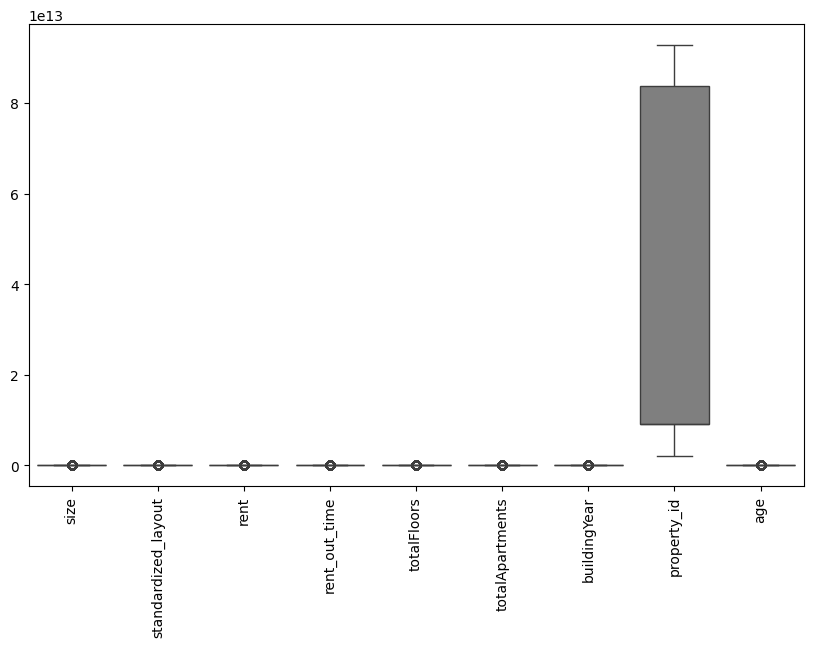

In [15]:
# Select only numerical columns for outlier detection
numerical_df = df.select_dtypes(include=[np.number])

# Detect outliers using the IQR method on numerical columns
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).sum()
print(outliers[outliers > 0])

# Visualize outliers using boxplots for numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_df)
plt.xticks(rotation=90)
plt.show()

# Handle outliers in the numerical dataframe (e.g., remove or cap them)
# Example: Removing outliers
numerical_df_no_outliers = numerical_df[~((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# If you need to update the original dataframe 'df', you can consider merging
# the outlier-handled numerical data back with the non-numerical columns.

In [16]:
# Check the column names in the dataframe
df.columns.tolist()

['size',
 'buildingType',
 'standardized_layout',
 'rent',
 'elevator',
 'siteOwner',
 'rent_out_time',
 'totalFloors',
 'totalApartments',
 'buildingYear',
 'property_id',
 'age']

In [17]:
df.isna().sum()

size                   0
buildingType           0
standardized_layout    0
rent                   0
elevator               0
siteOwner              0
rent_out_time          0
totalFloors            0
totalApartments        0
buildingYear           0
property_id            0
age                    0
dtype: int64

In [18]:
df.shape

(153313, 12)

In [19]:
df.isnull().sum()

size                   0
buildingType           0
standardized_layout    0
rent                   0
elevator               0
siteOwner              0
rent_out_time          0
totalFloors            0
totalApartments        0
buildingYear           0
property_id            0
age                    0
dtype: int64

In [20]:
#2. Feature Engineering
#2.1 Creation of New Features

# Now, calculate the 'rent_per_size' feature, handling zero division
df['rent_per_size'] = df.apply(lambda row: row['rent'] / row['size'] if row['size'] != 0 else 0, axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153313 entries, 0 to 161551
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   size                 153313 non-null  float64
 1   buildingType         153313 non-null  object 
 2   standardized_layout  153313 non-null  float64
 3   rent                 153313 non-null  float64
 4   elevator             153313 non-null  object 
 5   siteOwner            153313 non-null  object 
 6   rent_out_time        153313 non-null  float64
 7   totalFloors          153313 non-null  float64
 8   totalApartments      153313 non-null  float64
 9   buildingYear         153313 non-null  float64
 10  property_id          153313 non-null  float64
 11  age                  153313 non-null  float64
 12  rent_per_size        153313 non-null  float64
dtypes: float64(10), object(3)
memory usage: 16.4+ MB


In [22]:
df.to_csv('history_rental_cldf.csv', index=False)

In [23]:
categorical_columns = ['buildingType', 'standardized_layout', 'elevator', 'siteOwner']
for col in categorical_columns:
  print(df[col].unique())

['kerrostalo' 'rivitalo' 'luhtitalo' '8' '28' '16' '1' '2'
 'constant/building_type/']
[ 3.  1.  2.  4.  5.  6.  7. 24. 67. 29. 49. 35. 32. 18. 87.  9. 69. 48.
 55. 84. 85. 40. 28. 65. 36. 89. 45.]
['On' 'Ei hissiä' 'Ei tiedossa' 'Vesikeskuslämmitys']
['Oma' 'Vuokralla' 'Kauko- tai aluelämpö' 'Raskas polttoöljy'
 'Kevyt polttoöljy' 'Maalämpö tms.']


In [24]:
#2.2 Encoding of Categorical Variables
# Example: One-hot encoding for categorical variables
categorical_columns = ['buildingType','buildingYear', 'standardized_layout', 'elevator', 'siteOwner']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [25]:
df.shape

(153313, 184)

In [26]:
#2.3 Scaling of Numerical Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = df.select_dtypes(include=[float, int]).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153313 entries, 0 to 161551
Columns: 184 entries, size to siteOwner_Vuokralla
dtypes: bool(176), float64(8)
memory usage: 36.3 MB


In [28]:
#3. Data Splitting
#3.1 Appropriate Splitting Ratio

from sklearn.model_selection import train_test_split

X = df.drop('rent', axis=1)
y = df['rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
#3.2 Data Integrity Post-Split

# Check the shape of the split datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((122650, 183), (30663, 183), (122650,), (30663,))

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# Create and fit a linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)


# Calculate RMSE and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'RMSE: {rmse:.2f}') # Calculate RMSE
r2 = r2_score(y_test, y_pred_lr)
print(f'R-squared: {r2:.2f}') #calculate R2

RMSE: 30599444.02
R-squared: -939278903088731.38


In [32]:
from sklearn.linear_model import Lasso
# Create and fit the Lasso model
lasso_model = Lasso(alpha=1.0)  # Adjust alpha (regularization strength) as needed
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression:")
print("RMSE:", rmse_lasso)
print("R-squared:", r2_lasso)

Lasso Regression:
RMSE: 0.9984275031297973
R-squared: -1.3086296861697377e-06


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
from sklearn.linear_model import Ridge, ElasticNet
# Create and fit the Ridge model
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression:")
print("RMSE:", rmse_ridge)
print("R-squared:", r2_ridge)


Ridge Regression:
RMSE: 0.49803242857552915
R-squared: 0.7511814580075878


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
# Create and fit the Elastic Net model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Adjust alpha and l1_ratio
elastic_net_model.fit(X_train, y_train)

# Make predictions
y_pred_elastic = elastic_net_model.predict(X_test)

# Evaluate the model
rmse_elastic = mean_squared_error(y_test, y_pred_elastic, squared=False)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("\nElastic Net Regression:")
print("RMSE:", rmse_elastic)
print("R-squared:", r2_elastic)


Elastic Net Regression:
RMSE: 0.9852382934745834
R-squared: 0.026244186705352113


c:\Users\anike\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


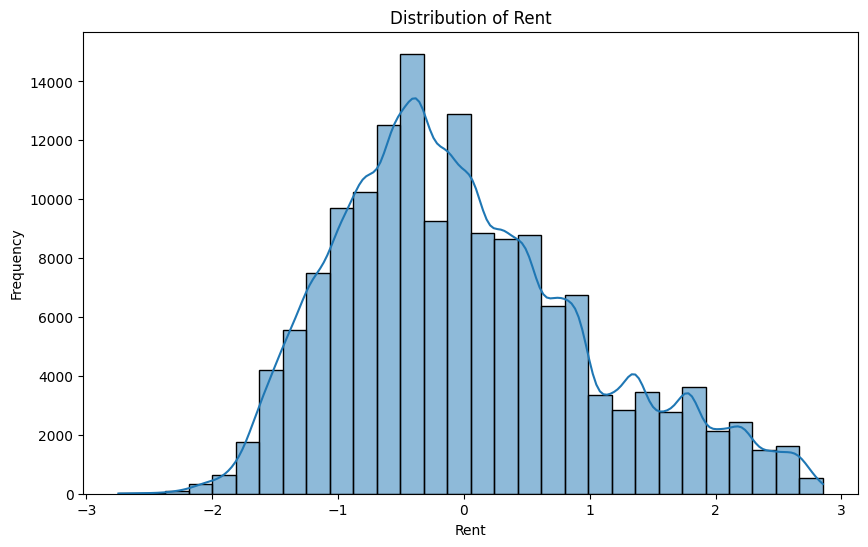

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert relevant columns to numeric, handling errors
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is of object (string) type
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, invalid parsing will be set as NaN
        except:
            pass  # Handle exceptions if any

# Example: Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['rent'], bins=30, kde=True)
plt.title('Distribution of Rent')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()


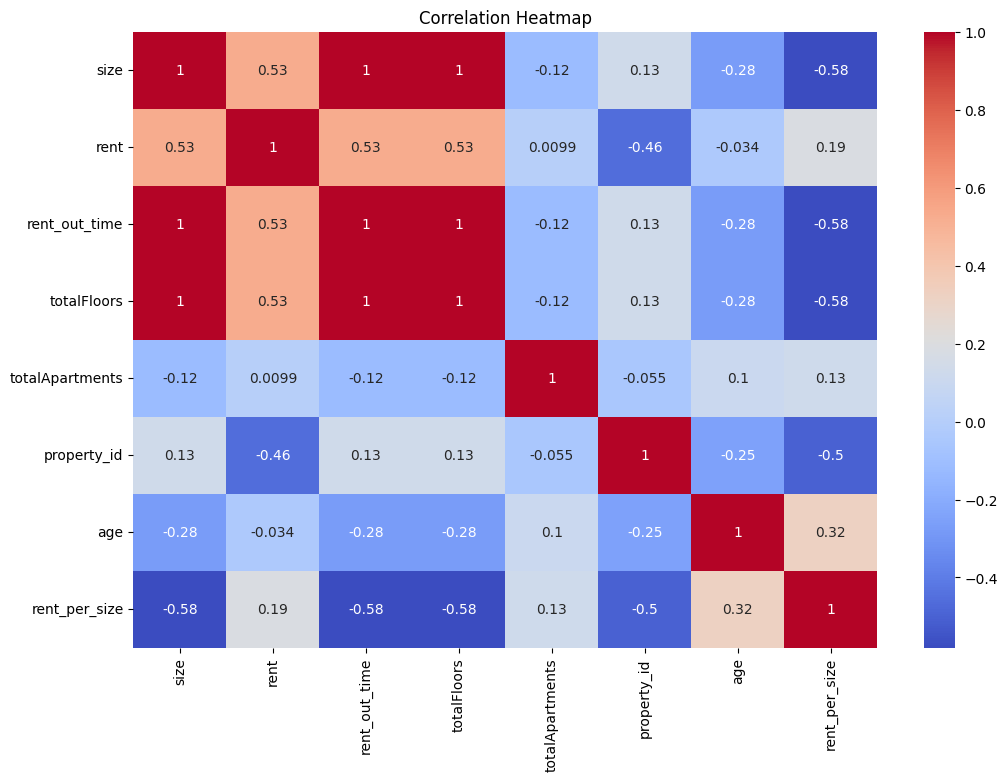

In [36]:
# Example: Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')  # Select only numeric columns for correlation
plt.title('Correlation Heatmap')
plt.show()

In [37]:
# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include=['number']).corr()


In [38]:
# Separate positive and negative correlations
positive_corr = corr_matrix.copy()
negative_corr = corr_matrix.copy()

positive_corr[positive_corr <= 0] = 0
negative_corr[negative_corr > 0] = 0

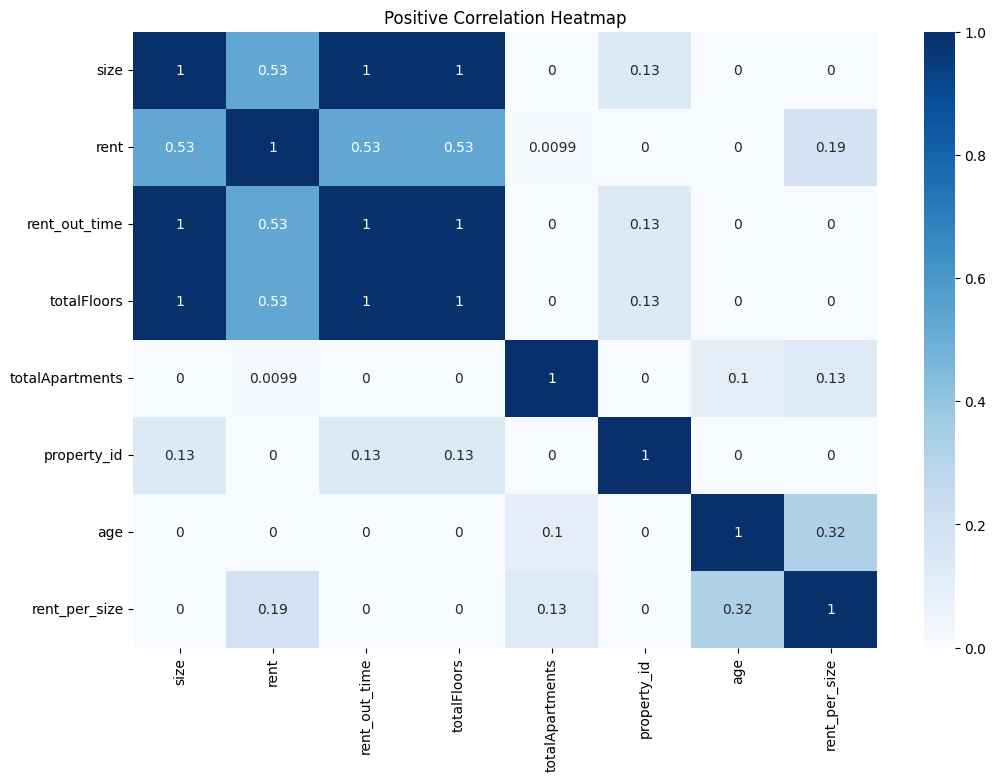

In [39]:
# Plot positive correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(positive_corr, annot=True, cmap='Blues', vmin=0, vmax=1)
plt.title('Positive Correlation Heatmap')
plt.show()

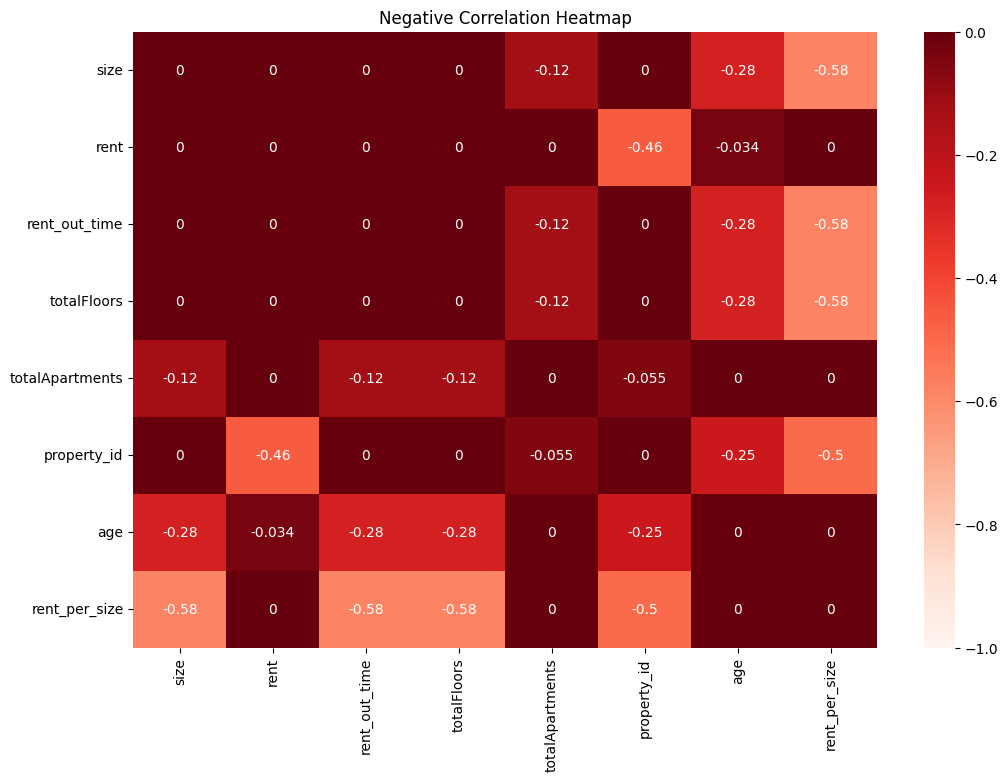

In [40]:
# Plot negative correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(negative_corr, annot=True, cmap='Reds', vmin=-1, vmax=0)
plt.title('Negative Correlation Heatmap')
plt.show()